In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df1 = pd.read_csv('Outlet-1.csv') # Reading Data
df2 = pd.read_csv('Outlet-2.csv')
df3 = pd.read_csv('Outlet-3.csv')
df4 = pd.read_csv('Outlet-4.csv')

df1 = df1.head(66238)
df2 = df2.head(31486)
df3 = df3.head(16754)
df4 = df4.head(19155)

# Converting to datetime datatype
df1['TransactionDateTime1'] = pd.to_datetime(df1['TransactionDateTime1'], infer_datetime_format=True) 
df2['TransactionDateTime1'] = pd.to_datetime(df2['TransactionDateTime1'], infer_datetime_format=True)
df3['TransactionDateTime1'] = pd.to_datetime(df3['TransactionDateTime1'], infer_datetime_format=True)
df4['TransactionDateTime1'] = pd.to_datetime(df4['TransactionDateTime1'], infer_datetime_format=True)

c:\users\sid\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Grouping on Outlet Number, Pump Number, Transaction Hour and aggregating the Quantity
d1 = df1.groupby([df1['OutletNumber'], df1['PumpNumber1'], df1['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d2 = df2.groupby([df2['OutletNumber'], df2['PumpNumber1'], df2['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d3 = df3.groupby([df3['OutletNumber'], df3['PumpNumber1'], df3['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})
d4 = df4.groupby([df4['OutletNumber'], df4['PumpNumber1'], df4['TransactionDateTime1'].dt.hour]).agg({'Quantity1':'sum'})

frames = [d1, d2, d3, d4]
d = pd.concat(frames) # Combining all the outlets

In [4]:
# Converting the transactions hour into columns via pivot table
p = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1')

ph = d.pivot_table('Quantity1', ['OutletNumber', 'PumpNumber1'], 'TransactionDateTime1').reset_index()

p.replace(np.nan, 0.00, inplace = True) # Replacing the null values with 0.00
p.head(30)

TransactionDateTime1           0       1       2       3       4       5   \
OutletNumber PumpNumber1                                                    
Outlet-1     1             233.71   32.38   14.21   26.00    5.01    3.00   
             4              23.48    0.00    0.00    0.00    0.00   31.86   
             8             112.97    0.00   20.32    0.00    0.00    0.00   
             13           1283.32  451.99  106.81  107.88  105.88  144.37   
             16           1140.15  816.36  406.72  221.24  274.23  153.40   
             17             60.63   30.61   78.53    0.00   22.12   32.82   
             20            157.57  148.51   52.62   34.94   13.48   25.36   
             21             64.37   70.68   42.67    5.13    0.00   10.08   
             24            325.16  194.75  137.91  105.34   56.98   82.29   
             26           1390.63  773.27  576.94  497.83  476.75  512.88   

TransactionDateTime1          6        7        8        9   ...       14  \
OutletNumber PumpNumber1                                     ...            
Outlet-1     1              0.00   662.57   834.11   840.92  ...  2274.41   
             4             89.70   182.66    35.15   242.23  ...   307.32   
             8              0.00   345.98   336.75   417.01  ...   822.96   
             13           582.70  1158.63  2213.37  1359.68  ...  3626.04   
             16           395.36   952.82   916.05   662.63  ...  2105.87   
             17            78.41   977.79  1402.34  1338.12  ...  2049.60   
             20           121.07   704.34   375.38   227.50  ...   705.90   
             21            25.32   412.50   291.47   267.90  ...   833.78   
             24            52.48   542.82   561.57   548.68  ...  1550.45   
             26           924.77   695.19   809.60   699.13  ...  1580.22   

TransactionDateTime1           15       16       17       18       19  \
OutletNumber PumpNumber1                                                
Outlet-1     1            1717.35  2361.76  2424.40  3453.12  2666.40   
             4             540.56   363.30   413.42   462.80   432.28   
             8             677.03   738.85   979.01  1079.54  1047.53   
             13           3131.37  3454.29  3942.93  4883.22  3855.94   
             16           1976.03  1956.79  2157.09  3391.72  2337.45   
             17           1500.09  1411.01  2009.31  2101.89  2189.53   
             20            245.49   589.13   812.93  1076.25   743.36   
             21            789.90  1015.70   895.65  1153.51   883.59   
             24           1212.48  1529.92  1759.65  2001.67  1628.52   
             26           1135.25  1325.99  1580.63  1567.05  1781.45   

TransactionDateTime1           20       21       22       23  
OutletNumber PumpNumber1                                      
Outlet-1     1            1333.94  1173.09  1076.08   523.87  
             4             223.99    93.34   233.32    30.87  
             8             501.74   208.63   382.76   218.11  
             13           3140.80  3107.60  2806.80  2152.53  
             16           1919.41  2007.25  1736.34  1553.10  
             17           1239.63   541.45   160.40    44.29  
             20            487.65   438.95   399.92   334.63  
             21            375.55   170.87   123.01    28.20  
             24           1080.71   599.17   911.55   471.90  
             26           1700.58  1966.43  2283.26  1839.74  

[10 rows x 24 columns]

In [43]:
da = p.max(axis = 1).reset_index() # Retreiving the maximum volume of each pump 
da.columns = ['OutletNumber', 'PumpNumber1', 'Quantity1']

db = p.idxmax(axis = 1).reset_index() # Retreiving the hour at which the pump has maximum volume
db.columns =  ['OutletNumber', 'PumpNumber1', 'TransactionDateTime1']

c = pd.merge(da, db) # Merging the table of maximum volume of each pump and at what hour of all outlets 
c

,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1
0,Outlet-1,1,3828.50,11
1,Outlet-1,4,1029.68,11
2,Outlet-1,8,1336.04,11
3,Outlet-1,13,4883.22,18
4,Outlet-1,16,3391.72,18
5,Outlet-1,17,2777.75,12
6,Outlet-1,20,1076.25,18
7,Outlet-1,21,1263.44,11
8,Outlet-1,24,2140.49,12
9,Outlet-1,26,2283.26,22


In [46]:
x = c.iloc[:, [1, 2, 3]].values
kmean = KMeans(n_clusters=3)
y_kmeans = kmean.fit_predict(x) # Categorised the clusters 
print(y_kmeans)
c['Category'] = y_kmeans
c

[1 2 2 1 1 0 2 2 0 0 0 0 0 2 2 0 0 0 2 1 2 2 2]


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
0,Outlet-1,1,3828.50,11,1
1,Outlet-1,4,1029.68,11,2
2,Outlet-1,8,1336.04,11,2
3,Outlet-1,13,4883.22,18,1
4,Outlet-1,16,3391.72,18,1
5,Outlet-1,17,2777.75,12,0
6,Outlet-1,20,1076.25,18,2
7,Outlet-1,21,1263.44,11,2
8,Outlet-1,24,2140.49,12,0
9,Outlet-1,26,2283.26,22,0


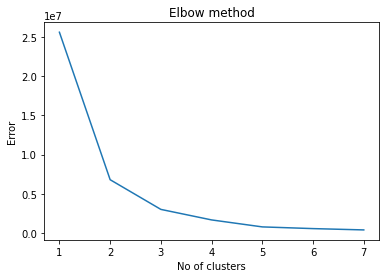

In [40]:
Error =[]
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 8), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

Text(0, 0.5, 'Quantity')

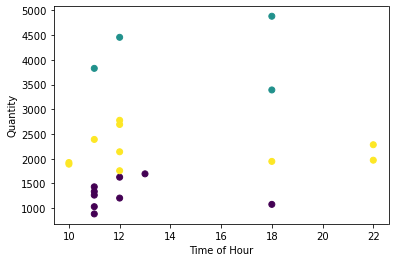

In [41]:
plt.scatter(x = c['TransactionDateTime1'], y = c['Quantity1'], c = y_kmeans) # clustered data plot
plt.xlabel('Time of Hour')
plt.ylabel('Quantity')

In [54]:
c.sort_values(['Quantity1'], ascending = False, inplace = True)
med = c['Quantity1'].median()
print('The median is:', med)
c

The median is: 1923.0599999999984


,OutletNumber,PumpNumber1,Quantity1,TransactionDateTime1,Category
3,Outlet-1,13,4883.22,18,1
19,Outlet-3,6,4456.82,12,1
0,Outlet-1,1,3828.50,11,1
4,Outlet-1,16,3391.72,18,1
5,Outlet-1,17,2777.75,12,0
10,Outlet-1,27,2693.01,12,0
17,Outlet-3,1,2390.45,11,0
9,Outlet-1,26,2283.26,22,0
8,Outlet-1,24,2140.49,12,0
11,Outlet-1,29,1970.23,22,0


In [49]:
c1 = c[c['Quantity1'] > med] 

In [50]:
c2 = c1.groupby([c['OutletNumber']])['OutletNumber'].count()
c2.idxmax(axis = 1)

'Outlet-1'

In [53]:
c2

OutletNumber
Outlet-1    9
Outlet-3    2
Name: OutletNumber, dtype: int64